## <h1 style="color: green;">LAB 02: WORKING WITH TIME-SERIES DATA</h1>

#### Import thư viện và dữ liệu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('Data/Road Accident Data.csv')

### 1. Thu Thập Dữ Liệu (Data Collection)

### 2. Khám Phá Dữ Liệu (Data Exploration)

### 3. Khám Phá Các Mối Quan Hệ Trong Dữ Liệu

#### 3.1 Khám phá các mối quan hệ đơn thuộc tính

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307973 entries, 0 to 307972
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Accident_Index              307973 non-null  object 
 1   Accident Date               307973 non-null  object 
 2   Day_of_Week                 307973 non-null  object 
 3   Junction_Control            307973 non-null  object 
 4   Junction_Detail             307973 non-null  object 
 5   Accident_Severity           307973 non-null  object 
 6   Latitude                    307973 non-null  float64
 7   Light_Conditions            307973 non-null  object 
 8   Local_Authority_(District)  307973 non-null  object 
 9   Carriageway_Hazards         307970 non-null  object 
 10  Longitude                   307973 non-null  float64
 11  Number_of_Casualties        307973 non-null  int64  
 12  Number_of_Vehicles          307973 non-null  int64  
 13  Police_Force  

In [4]:
# Set the visual style
sns.set(style="whitegrid")

# Function to create bar plots for categorical attributes
def plot_bar(column_name, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column_name, palette="viridis", order=df[column_name].value_counts().index)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.show()

def pie_chart(name, title):
    tmp = df[name].value_counts()
    total = tmp.sum()
    threshold = 0.05  
    small_categories = tmp[tmp / total < threshold]

    if not small_categories.empty:
        tmp.loc['Other'] = small_categories.sum()
        tmp = tmp.drop(small_categories.index)  

    plt.figure(figsize=(10, 6))
    plt.pie(tmp, labels=tmp.index, autopct='%1.1f%%', startangle=90)
    plt.title(title)
    plt.show()

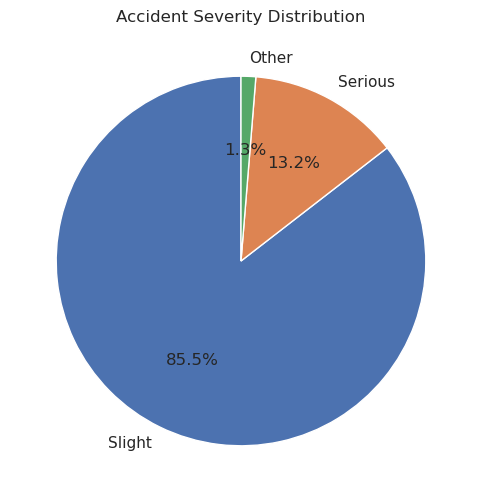

In [5]:
# Accident Severity
pie_chart('Accident_Severity', 'Accident Severity Distribution')

- Hầu hết các tai nạn là ở mức nhẹ, còn lại một vài tai nạn ở mức nghiêm trọng và tử vong.

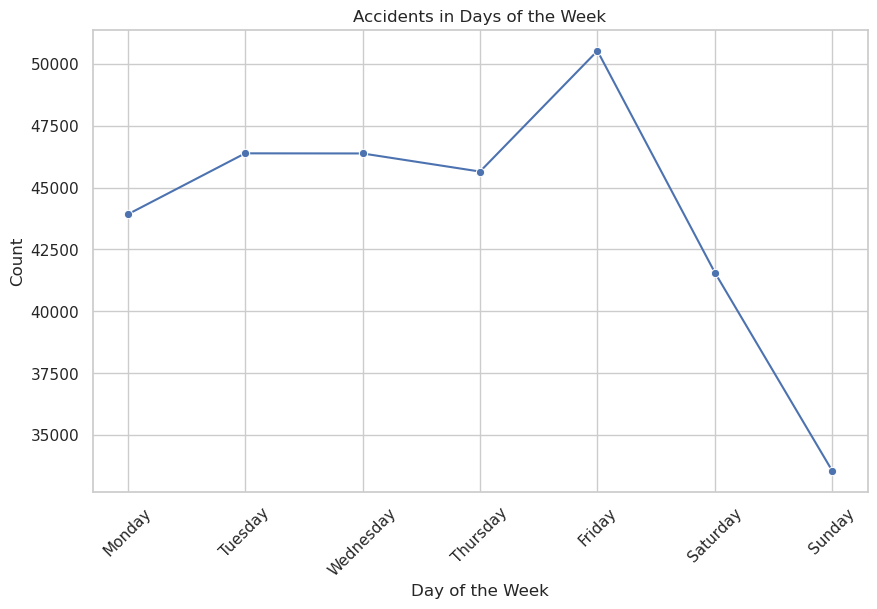

In [6]:
# Day of the Week
cmp = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

# Count occurrences of each day of the week
day_counts = df['Day_of_Week'].value_counts().reset_index()
day_counts.columns = ['Day_of_Week', 'Count']

# Map the days of the week to their values
day_counts['day_value'] = day_counts['Day_of_Week'].map(cmp)

# Sort the data frame based on the new column
day_counts = day_counts.sort_values(by='day_value')

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=day_counts['Day_of_Week'], y=day_counts['Count'], marker='o')
plt.xticks(rotation=45)
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Accidents in Days of the Week')
plt.grid(True)
plt.show()

- Các tai nạn xảy ra chủ yếu là vào các ngày trong tuần, điều này có thể là do trong tuần thì lượng xe lưu thông trên đường lớn hơn do mọi người phải đi làm, cao điểm là vào thứ 6. Vào thứ 7 và chủ nhật thì lượng tai nạn có giảm nhẹ so với trong tuần.

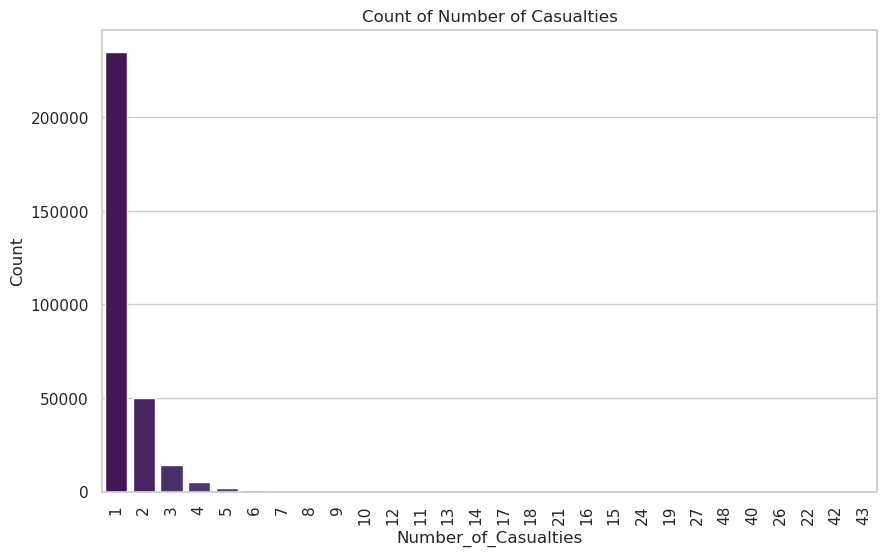

In [7]:
# Number of casualties
plot_bar("Number_of_Casualties", "Count of Number of Casualties", "Number_of_Casualties", "Count")

- Đa số các vụ tai nạn có số lượng người tử vong thấp, tuy nhiên vẫn có một số vụ có số lượng người tử vong rất lớn, lên đến 43 người.

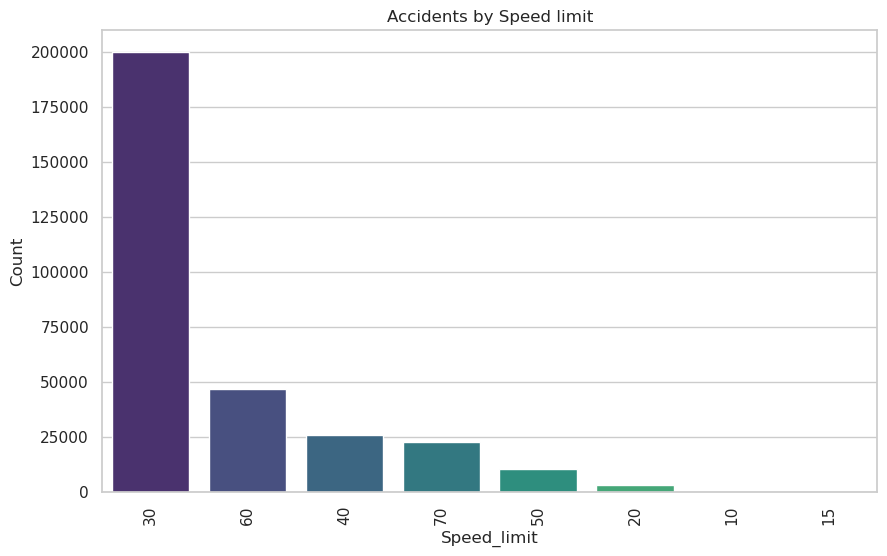

In [8]:
# Speed limit
plot_bar("Speed_limit", "Accidents by Speed limit", "Speed_limit", "Count")

- Lượng tai nạn tập trung chủ yếu ở các đoạn đường có giới hạn tốc độ là 30mph (~50km/h), điều này có thể là do hầu hết các đoạn đường này sẽ có lượng xe lưu thông lớn hơn hoặc có thể do hầu hết các đoạn đường sẽ có giới hạn là 30mph.

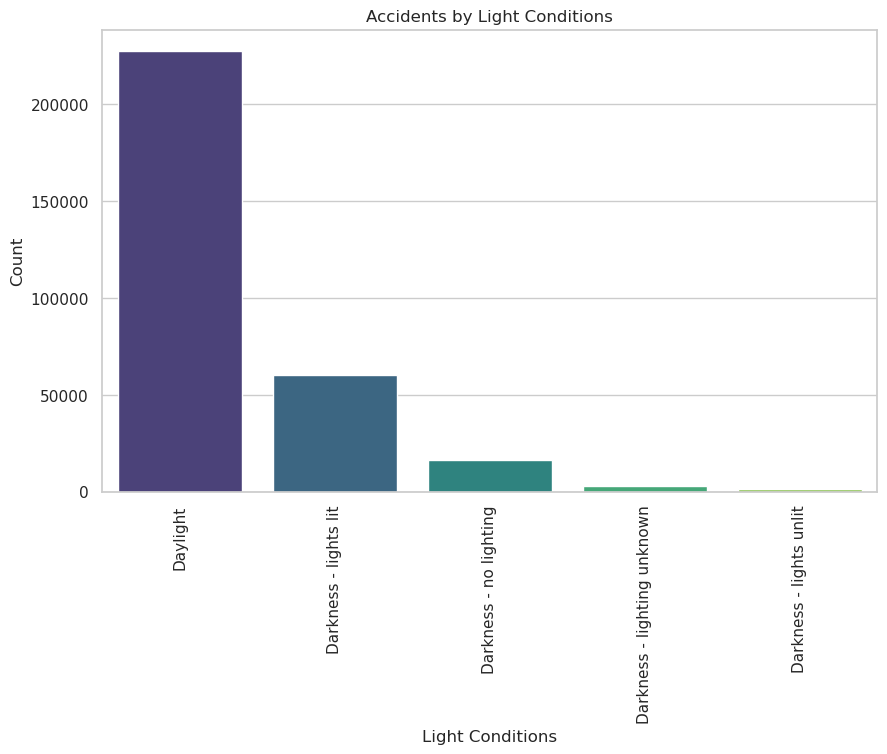

In [9]:
# Light Conditions
plot_bar("Light_Conditions", "Accidents by Light Conditions", "Light Conditions", "Count")

- Hầu hết các vụ tai nạn diễn ra vào ban ngày, điều này có thể là do lượng xe lưu thông vào ban ngày nhiều hơn so với những thời điểm khác trong ngày.

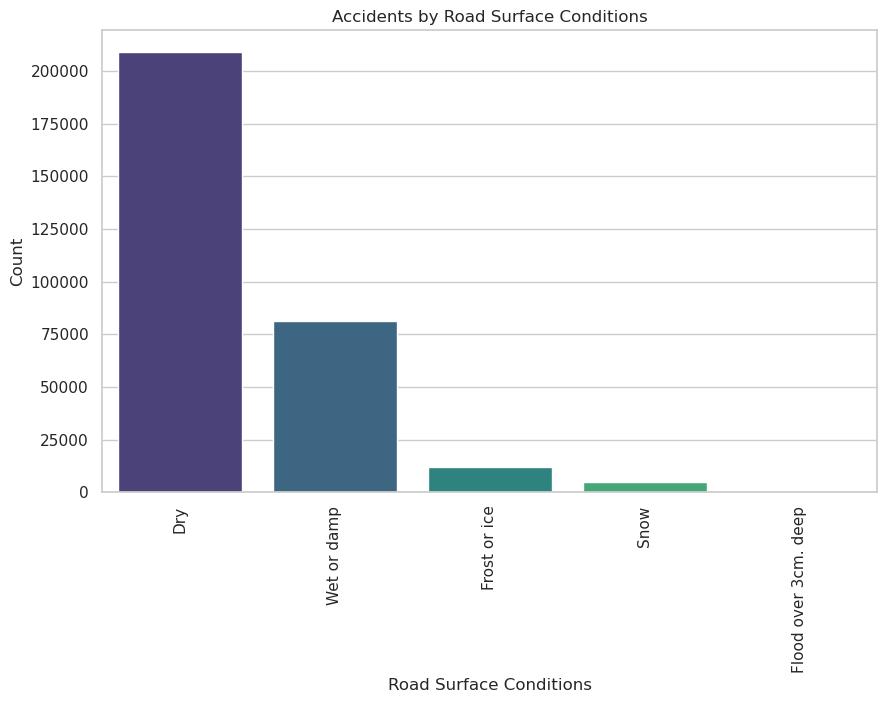

In [10]:
# Road Surface Conditions
plot_bar("Road_Surface_Conditions", "Accidents by Road Surface Conditions", "Road Surface Conditions", "Count")

- Biểu đồ cho thấy phần lớn tai nạn xảy ra trên mặt đường khô, tuy nhiên, các tình trạng như đường ướt, có tuyết hoặc băng cũng góp phần quan trọng vào số vụ tai nạn. Điều này cho thấy tầm quan trọng của việc lái xe cẩn thận trong điều kiện thời tiết xấu và duy trì cơ sở hạ tầng giao thông an toàn, đặc biệt trong các vùng có khí hậu lạnh hoặc mùa mưa.

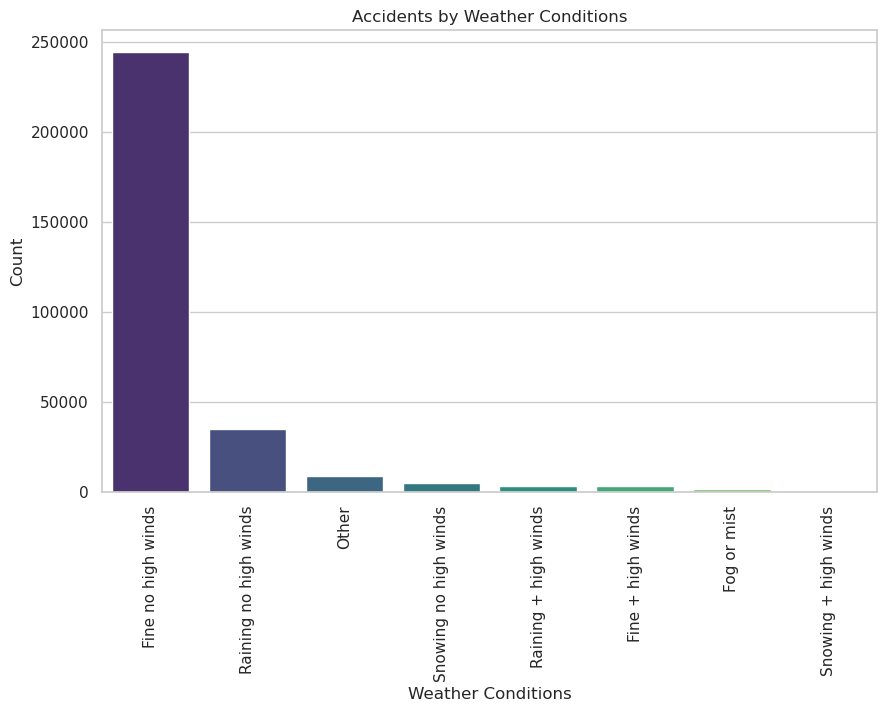

In [11]:
# Weather Conditions
plot_bar("Weather_Conditions", "Accidents by Weather Conditions", "Weather Conditions", "Count")

- Có thể thấy rằng tai nạn xảy ra chủ yếu trong điều kiện thời tiết tốt, không có gió mạnh. Tuy nhiên, mưa và gió mạnh có tác động rõ rệt đến sự an toàn giao thông, làm tăng nguy cơ tai nạn. 

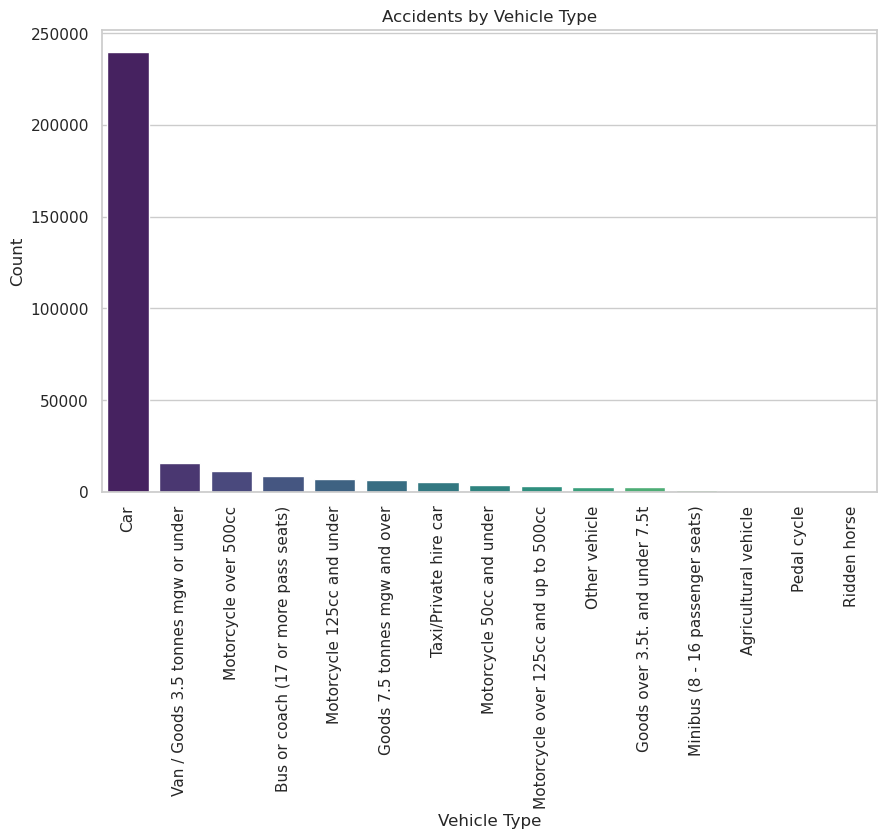

In [12]:
# Vehicle Type
plot_bar("Vehicle_Type", "Accidents by Vehicle Type", "Vehicle Type", "Count")

- Hầu hết các vụ tai nạn là bởi xe ô tô, điều này có thể là do xe ô tô là loại xe phổ biến ở London (là khu vực được lấy dữ liệu)

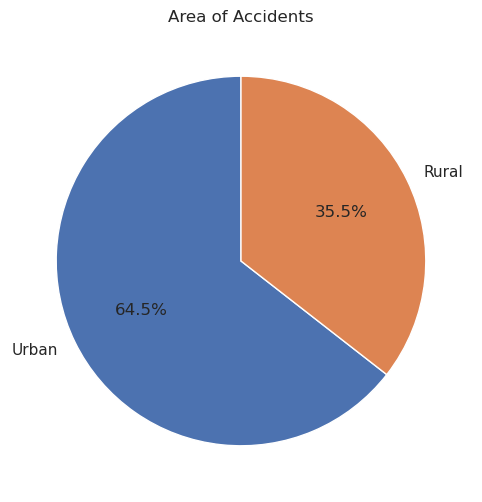

In [13]:
# Urban or rural
pie_chart('Urban_or_Rural_Area', 'Area of Accidents')

- Số lượng tai nạn ở khu vực thành phố nhiều gấp đôi so với nông thôn. Điều này cũng dễ hiểu vì ở thành phố thường sẽ có lượng xe lưu thông lớn hơn.

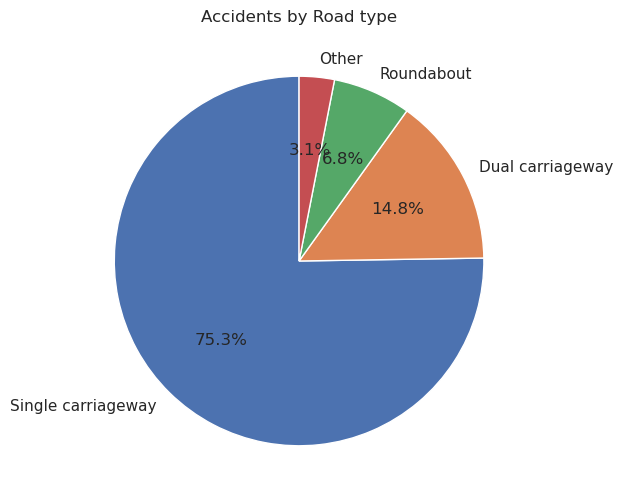

In [14]:
# Road type
pie_chart('Road_Type', 'Accidents by Road type')

- 3/4 số tai nạn là diễn ra ở đường 1 chiều, điều này có thể là do lưu lượng giao thông lớn trên các tuyến đường một chiều có thể tạo ra áp lực giao thông dày đặc, khiến các xe phải di chuyển gần nhau hơn và dễ gây ra va chạm. Còn lại là tập trung ở đường 2 chiều và ở các bùng binh.

#### 3.2 Khám phá các mối quan hệ đa thuộc tính

Câu hỏi: Giờ nào trong ngày có số tai nạn giao thông cao nhất?

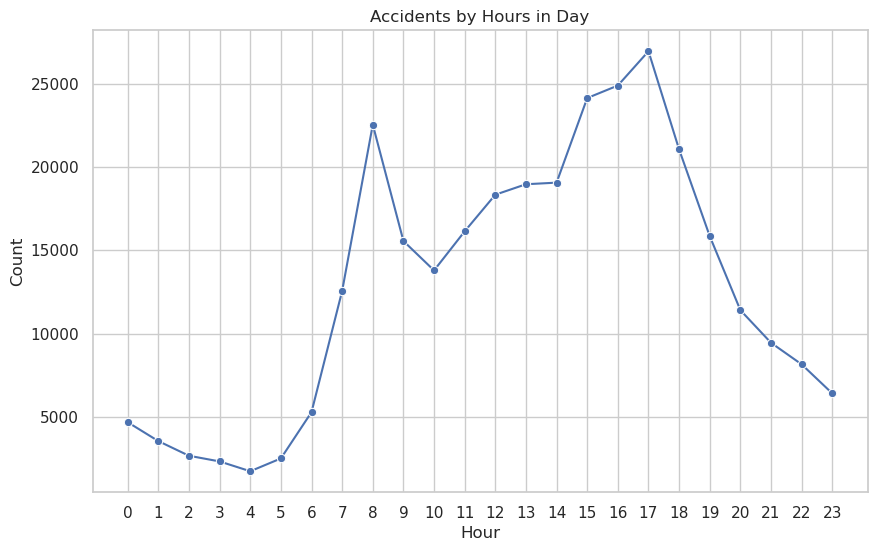

In [15]:
x = np.array(df['Time'].dropna().str.split(':', expand=True).astype(int))[:, 0]
x = np.unique(x, return_counts=True)
plt.figure(figsize=(10, 6))
sns.lineplot(x=x[0], y=x[1], marker='o')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.xticks(np.arange(24))
plt.title('Accidents by Hours in Day')
plt.grid(True)

- Tai nạn thường xảy ra vào các thời gian cao điểm trong ngày như 8h sáng và 5h chiều, đây là những lúc có lượng xe trên đường khá lớn do mọi người sẽ bắt đầu đi làm/tan làm. Số lượng tai nạn sẽ thấp hơn vào buổi tối và trưa vì những lúc này lượng xe sẽ thấp hơn nhiều. Do vậy để giảm nguy cơ gặp tai nạn, không nên ra ngoài vào những giờ cao điểm trừ khi thực sự cần thiết.

Câu hỏi:

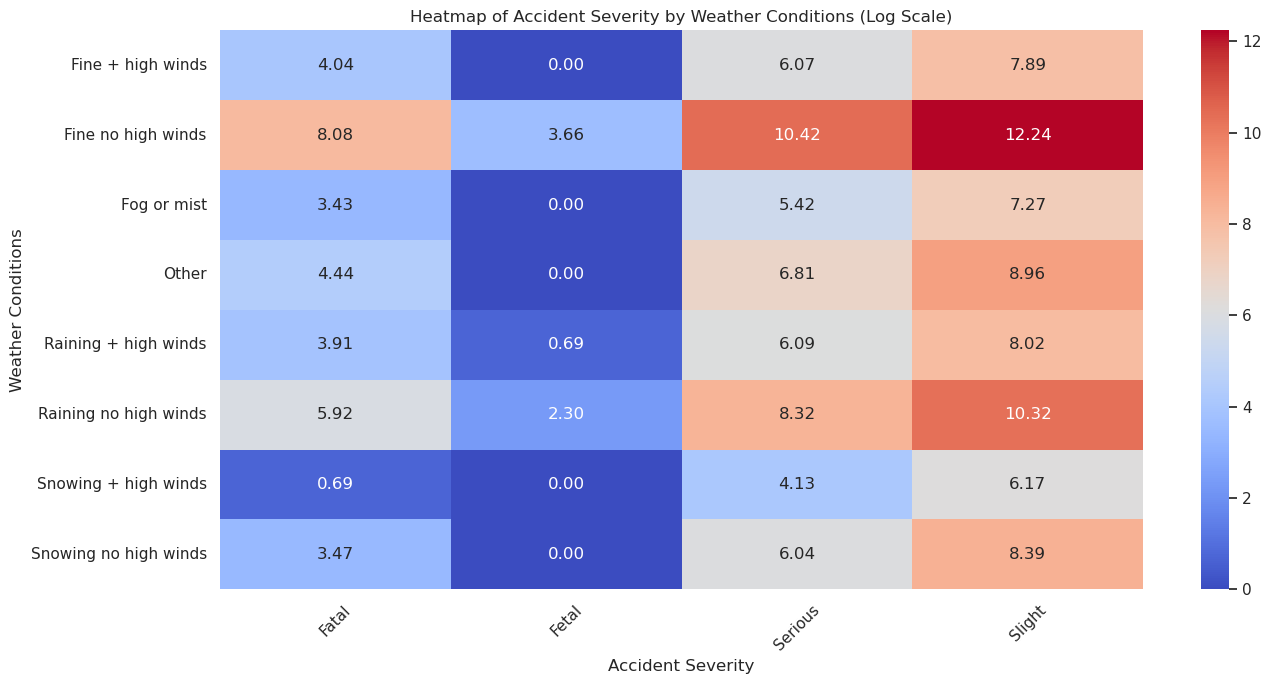

In [29]:
severity_weather = df[['Accident_Severity', 'Weather_Conditions']]

# Đếm số lượng tai nạn theo mức độ nghiêm trọng và điều kiện thời tiết
severity_weather_counts = severity_weather.groupby(['Weather_Conditions', 'Accident_Severity']).size().unstack().fillna(0)

# Áp dụng log scale lên dữ liệu
severity_weather_counts_log = np.log1p(severity_weather_counts)  # log1p(x) = log(1 + x)

# Vẽ heatmap với log scale
plt.figure(figsize=(14, 7))
sns.heatmap(severity_weather_counts_log, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Heatmap of Accident Severity by Weather Conditions (Log Scale)')
plt.xlabel('Accident Severity')
plt.ylabel('Weather Conditions')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

\**Việc sử dụng thang đo logarit giúp hiển thị rõ hơn sự khác biệt giữa các giá trị lớn và nhỏ.*

- Trời đẹp không có gió mạnh liên tục ghi nhận tỷ lệ tai nạn cao nhất trên mọi mức độ nghiêm trọng, có thể do lưu lượng giao thông lớn trong điều kiện thời tiết thuận lợi.

- Các điều kiện thời tiết khắc nghiệt như "Tuyết rơi + gió mạnh" thường có tỷ lệ tai nạn thấp hơn, có khả năng do người dân hạn chế di chuyển.

- Các điều kiện trung bình như "Mưa không có gió mạnh" vẫn đóng góp đáng kể vào tai nạn, đặc biệt ở mức "Nghiêm trọng" và "Nhẹ."

Như vậy ngoài việc cần cẩn trọng hơn khi thời tiết xấu, gây cản trở giao thông, người tham gia giao thông cũng không nên chủ quan khi thời tiết bình thường.

### 3.3 Phân tích sử dụng mô hình Machine learning